In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertisement-and-sales-data-for-analysis/Advertising And Sales.csv


# Understanding & Analyzing the Dataset

In [2]:
df = pd.read_csv('/kaggle/input/advertisement-and-sales-data-for-analysis/Advertising And Sales.csv')
df.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,12.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df.nunique()

ID           200
TV           190
Radio        168
Newspaper    172
Sales        121
dtype: int64

In [6]:
df['TV'].describe()

count    200.000000
mean     147.032500
std       85.885186
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

In [7]:
df['Radio'].describe()

count    200.00000
mean      23.28950
std       14.86997
min        0.00000
25%       10.07500
50%       22.90000
75%       36.52500
max       49.60000
Name: Radio, dtype: float64

In [8]:
df['Newspaper'].describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: Newspaper, dtype: float64

In [9]:
df['Sales'].describe()

count    200.0000
mean      14.0380
std        5.2094
min        1.6000
25%       10.4000
50%       12.9000
75%       17.4000
max       27.0000
Name: Sales, dtype: float64

In [10]:
Q1 = df['TV'].quantile(0.25)
Q3 = df['TV'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['TV'] < Q1 - 1.5 * IQR) | (df['TV'] > Q3 + 1.5 * IQR)]
print(outliers)

Empty DataFrame
Columns: [ID, TV, Radio, Newspaper, Sales]
Index: []


In [11]:
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Newspaper'] < Q1 - 1.5 * IQR) | (df['Newspaper'] > Q3 + 1.5 * IQR)]
print(outliers)

      ID     TV  Radio  Newspaper  Sales
16    17   67.8   36.6      114.0   12.5
101  102  296.4   36.3      100.9   23.8


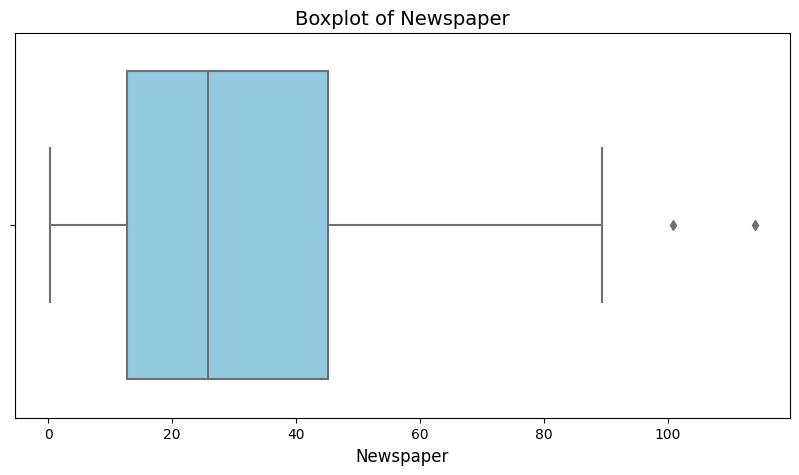

In [12]:
# Plot boxplot untuk atribut Newspaper
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Newspaper'], color='skyblue')
plt.title('Boxplot of Newspaper', fontsize=14)
plt.xlabel('Newspaper', fontsize=12)
plt.show()

# Regression Analysis

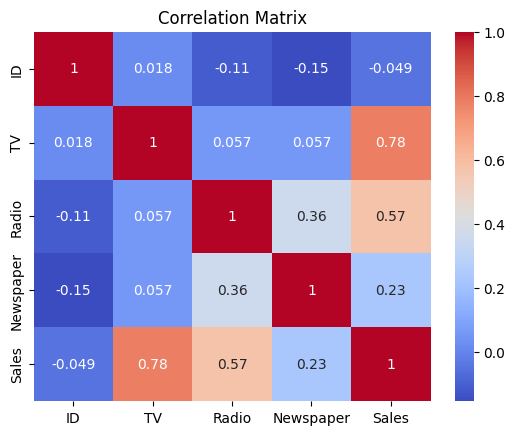

In [14]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [16]:
# Feature and target
# Feature
X = df[['TV', 'Radio', 'Newspaper']]
# Target
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3.157334591646867
R-squared: 0.899969103117516


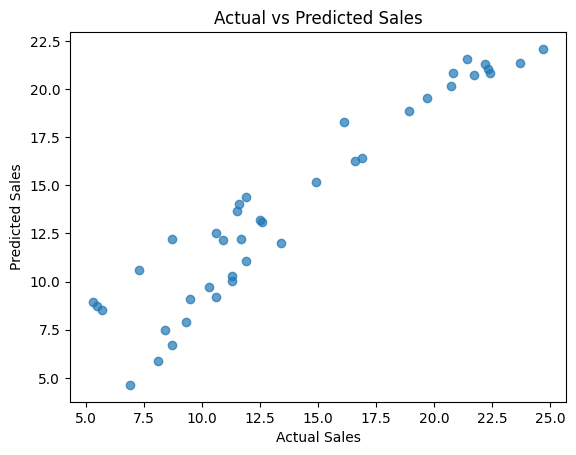

In [19]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

# Comparative Analysis

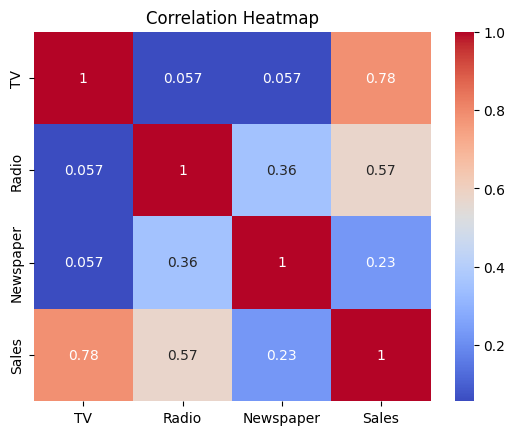

In [20]:
sns.heatmap(df[['TV', 'Radio', 'Newspaper', 'Sales']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

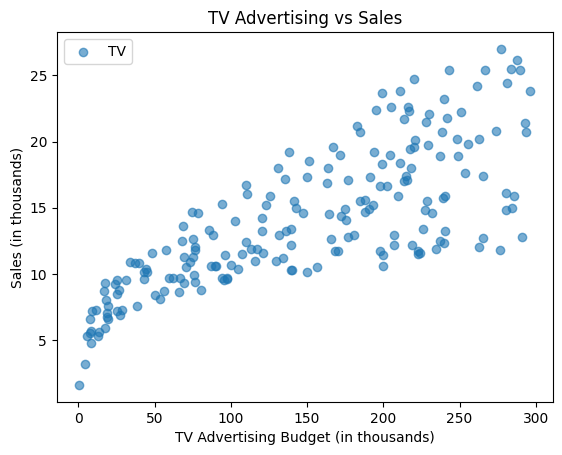

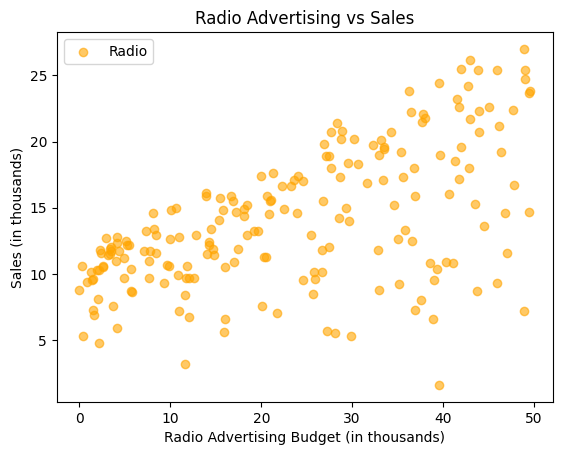

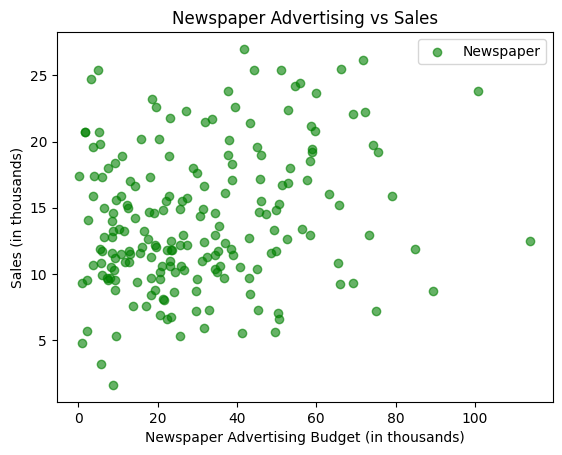

In [21]:
# TV vs Sales
plt.scatter(df['TV'], df['Sales'], alpha=0.6, label='TV')
plt.xlabel('TV Advertising Budget (in thousands)')
plt.ylabel('Sales (in thousands)')
plt.title('TV Advertising vs Sales')
plt.legend()
plt.show()

# Radio vs Sales
plt.scatter(df['Radio'], df['Sales'], alpha=0.6, color='orange', label='Radio')
plt.xlabel('Radio Advertising Budget (in thousands)')
plt.ylabel('Sales (in thousands)')
plt.title('Radio Advertising vs Sales')
plt.legend()
plt.show()

# Newspaper vs Sales
plt.scatter(df['Newspaper'], df['Sales'], alpha=0.6, color='green', label='Newspaper')
plt.xlabel('Newspaper Advertising Budget (in thousands)')
plt.ylabel('Sales (in thousands)')
plt.title('Newspaper Advertising vs Sales')
plt.legend()
plt.show()

In [22]:
def simple_regression(feature, target):
    model = LinearRegression()
    model.fit(feature, target)
    predictions = model.predict(feature)
    return r2_score(target, predictions)

r2_tv = simple_regression(df[['TV']], df['Sales'])
r2_radio = simple_regression(df[['Radio']], df['Sales'])
r2_newspaper = simple_regression(df[['Newspaper']], df['Sales'])

print(f"R-squared for TV: {r2_tv}")
print(f"R-squared for Radio: {r2_radio}")
print(f"R-squared for Newspaper: {r2_newspaper}")

R-squared for TV: 0.6134803744516317
R-squared for Radio: 0.33054332809086917
R-squared for Newspaper: 0.05147075743160445


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


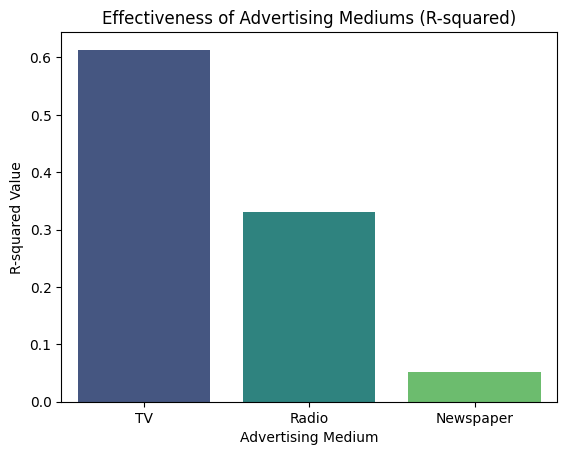

In [23]:
effectiveness = {'TV': r2_tv, 'Radio': r2_radio, 'Newspaper': r2_newspaper}
sns.barplot(x=list(effectiveness.keys()), y=list(effectiveness.values()), palette='viridis')
plt.title('Effectiveness of Advertising Mediums (R-squared)')
plt.ylabel('R-squared Value')
plt.xlabel('Advertising Medium')
plt.show()

# Optimization

In [26]:
from scipy.optimize import linprog

# Regression coefficients (based on previous regression analysis)
coef_sales = [147.03, 23.29, 30.55]  # TV, Radio, Newspaper

# Goal function (regression coefficient with a negative sign because it wants to maximize)
c = [-coef_sales[0], -coef_sales[1], -coef_sales[2]]

# Constraints
A = [[1, 1, 1]]  # Total budget constraint
b = [500]  # Maximum budget in thousands

# Bounds for each production
x_bounds = (0, None)  # TV
y_bounds = (0, None)  # Radio
z_bounds = (0, None)  # Newspaper
bounds = [x_bounds, y_bounds, z_bounds]

# Optimisation
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Output results
print("Optimal allocation:")
print(f"TV: ${result.x[0]:.2f}k")
print(f"Radio: ${result.x[1]:.2f}k")
print(f"Newspaper: ${result.x[2]:.2f}k")

Optimal allocation:
TV: $500.00k
Radio: $0.00k
Newspaper: $0.00k
